# Figure 2 - figure supplement 2B

In [1]:
# required libraries
import os
import random
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def plot_create():
    #plt.title('Predicted clone velocities', y=1.05, size=65)
    plt.xlabel('AP position' + ' (' + r'$\mu$'+'m)')
    plt.ylabel('Velocity' + ' (' + r'$\mu$'+'m/day)')
    plt.ylim(0,450)
    fig.set_size_inches(18.5, 12.5)
    plt.rcParams.update({'font.size': 42})
    filename = "./" + "Fig_3B.png"    
    fig.savefig(filename, dpi=300, bbox_inches='tight')   

In [3]:
# run parameters    
n0_mean,n0_std = 196,2 # n0 mean and standar deviation
l_mean,l_std = 828,30      # lambda mean and standar deviation
tau_mean,tau_std = 85,12   # tau mean and standar deviation

root = "../main/simulations/"
model = 'outgrowth/'
parameters = 'n0='+str(n0_mean)+'\n'+'l='+str(l_mean)+'\n'+'tau='+str(tau_mean)+'/'
path = root+model+parameters

clones = np.arange(1,83,6)    # From -1100 to 0um (50um by 50um). Similar to Rost et al.
bins = np.arange(-1200, 2800, 800)

velocities = {-800:[],0:[],800:[],1600:[]}
files = os.listdir(path)
files = sorted(files)
for clone,seed in zip(clones,files):
    opened_file = open(path+seed)
    data = pd.read_csv(opened_file, delimiter=',')
    data['bin'] = pd.cut(data.position, bins, include_lowest=True, labels=[-800, 0, 800, 1600])
    data = data[['clone','position', 'bin']].dropna()
    data = data.set_index(['clone','bin'])
    data_clone = data.xs(clone,level='clone')
    data_clone = data_clone.reset_index()
    for eachBin in velocities.keys():
        data_bin = data_clone[data_clone['bin']==eachBin]
        if len(data_bin) > 2:
            slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(0,len(data_bin['position'])),data_bin['position'])    
            velocities[eachBin].append(slope*24)
        else:
            velocities[eachBin].append(np.nan)

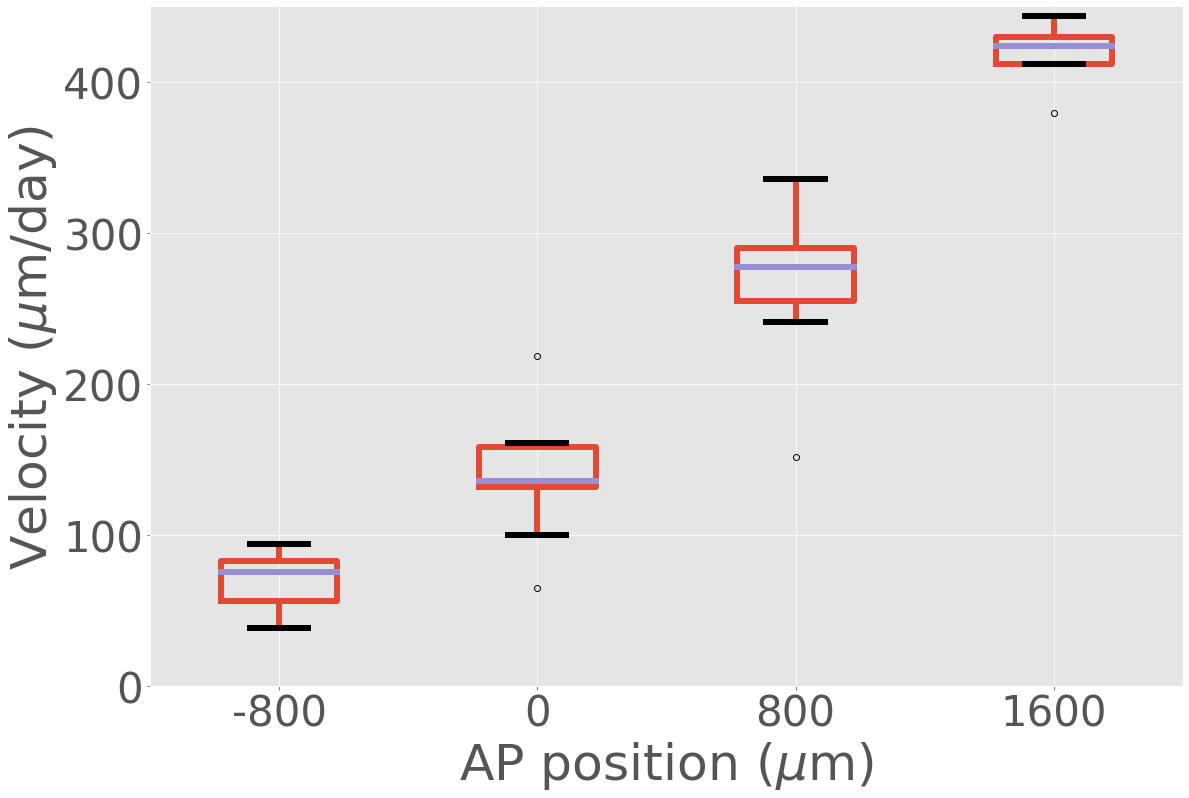

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

df = pd.DataFrame.from_dict(velocities,orient='index').transpose()
bp = df.boxplot(boxprops=dict(linewidth=6),medianprops=dict(linewidth=6),whiskerprops=dict(linewidth=6),capprops=dict(linewidth=6))

plt.xticks([1,2,3,4],[-800,0,800,1600])

plot_create()